# Análise de Clusters e Variáveis no Conjunto de Dados

Este notebook tem como objetivo realizar uma análise exploratória e visualização de dados, focando em clusters e variáveis específicas. Usaremos técnicas de agrupamento (como KMeans) e testes estatísticos para entender melhor as relações entre as variáveis.

## 1. Preparação do Ambiente

### 1.1. Importação de Bibliotecas

As bibliotecas necessárias para a execução do projeto são importadas. As principais bibliotecas utilizadas incluem `pandas`, `matplotlib`, `seaborn`, `sklearn`, entre outras. Estas são responsáveis pela manipulação de dados, visualização e aplicação de algoritmos de clustering.

```python
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as pl
from sklearn.feature_selection import f_classif
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances



In [3534]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as pl
from sklearn.feature_selection import f_classif
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### 1.2 Carregar a base de dados (obtido pela raspagem do site da olx)

In [3536]:
df = pd.read_csv('./data/df.csv')

## 2.0 Visualização dos dados

In [3538]:
df.head()

,id,titulo,preco,marca,modelo,km,ano,tipo,pot_motor,kit_gnv,cor,combustivel,portas,cambio,direcao,municipio,url
0,1,volkswagen voyage 1.0 flex 12v 4p 2023 - 13447...,63390.0,volkswagen,volkswagen voyage 1.0 flex 12v 4p,49798,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica,são bernardo do campo,https://sp.olx.com.br/sao-paulo-e-regiao/autos...
1,2,fiat argo drive 1.0 firefly 2024 - 1347684544 ...,73990.0,fiat,fiat argo drive 1.0 firefly,47248,2024,hatch,1.0,0,branco,flex,4.0,manual,elétrica,contagem,https://mg.olx.com.br/belo-horizonte-e-regiao/...
2,3,volkswagen voyage 1.0 flex 12v 4p 2023 - 13522...,59590.0,volkswagen,volkswagen voyage 1.0 flex 12v 4p,44762,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica,são bernardo do campo,https://sp.olx.com.br/sao-paulo-e-regiao/autos...
3,4,hyundai hb20x style 1.6 flex 16v mec. 2014 - 1...,52900.0,hyundai,hyundai hb20x style 1.6 flex 16v mec.,116000,2014,hatch,1.6,0,branco,flex,4.0,manual,hidráulica,sorocaba,https://sp.olx.com.br/regiao-de-sorocaba/autos...
4,27,volkswagen polo 1.0 mpi flex 12v 5p 2023 - 134...,76190.0,volkswagen,volkswagen polo 1.0 mpi flex 12v 5p,54463,2023,hatch,1.0,0,cinza,flex,4.0,manual,mecânica,ribeirão preto,https://sp.olx.com.br/regiao-de-ribeirao-preto...


Removendo colunas inuteis e optando por remover a coluna municipio

In [3540]:
df.head(1)

,id,titulo,preco,marca,modelo,km,ano,tipo,pot_motor,kit_gnv,cor,combustivel,portas,cambio,direcao,municipio,url
0,1,volkswagen voyage 1.0 flex 12v 4p 2023 - 13447...,63390.0,volkswagen,volkswagen voyage 1.0 flex 12v 4p,49798,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica,são bernardo do campo,https://sp.olx.com.br/sao-paulo-e-regiao/autos...


In [3541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1189 non-null   int64  
 1   titulo       1189 non-null   object 
 2   preco        1177 non-null   float64
 3   marca        1189 non-null   object 
 4   modelo       1189 non-null   object 
 5   km           1189 non-null   int64  
 6   ano          1189 non-null   int64  
 7   tipo         1170 non-null   object 
 8   pot_motor    1136 non-null   object 
 9   kit_gnv      1189 non-null   int64  
 10  cor          1152 non-null   object 
 11  combustivel  1185 non-null   object 
 12  portas       1160 non-null   float64
 13  cambio       1182 non-null   object 
 14  direcao      1142 non-null   object 
 15  municipio    1189 non-null   object 
 16  url          1189 non-null   object 
dtypes: float64(2), int64(4), object(11)
memory usage: 158.0+ KB


In [3542]:
df.nunique()

id             1189
titulo         1189
preco           711
marca            29
modelo          624
km              827
ano              41
tipo             12
pot_motor        12
kit_gnv           2
cor              10
combustivel       6
portas            3
cambio            4
direcao           5
municipio       220
url            1189
dtype: int64

In [3543]:
df.describe()

,id,preco,km,ano,kit_gnv,portas
count,1189.000000,1.177000e+03,1189.000000,1189.000000,1189.000000,1160.000000
mean,753.375105,8.422815e+04,80708.780488,2018.154752,0.025231,3.852586
std,365.185266,7.368716e+04,64926.961441,6.873896,0.156893,0.520331
min,1.000000,0.000000e+00,0.000000,1967.000000,0.000000,2.000000
25%,454.000000,4.990000e+04,44434.000000,2015.000000,0.000000,4.000000
50%,762.000000,7.190000e+04,60225.000000,2020.000000,0.000000,4.000000
75%,1068.000000,1.029900e+05,107000.000000,2023.000000,0.000000,4.000000
max,1367.000000,1.289000e+06,800000.000000,2025.000000,1.000000,4.000000


### 3.0 Remoção de dados que não irão ser usados no cluster

In [3545]:
df = df.drop(['titulo', 'url', 'municipio', 'modelo'], axis=1)
df = df.set_index('id')

In [3546]:
df.head()

,preco,marca,km,ano,tipo,pot_motor,kit_gnv,cor,combustivel,portas,cambio,direcao
id,,,,,,,,,,,,
1,63390.0,volkswagen,49798,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica
2,73990.0,fiat,47248,2024,hatch,1.0,0,branco,flex,4.0,manual,elétrica
3,59590.0,volkswagen,44762,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica
4,52900.0,hyundai,116000,2014,hatch,1.6,0,branco,flex,4.0,manual,hidráulica
27,76190.0,volkswagen,54463,2023,hatch,1.0,0,cinza,flex,4.0,manual,mecânica


### 3.1 Tratamento de valores nulos com o método ffill

In [3548]:
df = df.fillna(method='ffill')

In [3549]:
df['preco'].min(), df['preco'].max()

(0.0, 1289000.0)

In [3550]:
df = df.drop(df['preco'].loc[df['preco'] <= 1].index, axis=0)

In [3551]:
df['preco'].min(), df['preco'].max()

(1900.0, 1289000.0)

# Criando faixas de valores

#### Tratar os valores da coluna 'pot_motor' para dividir em faixas

In [3554]:
def tratar_pot_motor(df):
    # Criar uma nova coluna com os valores tratados
    def tratar_valor(x):
        if isinstance(x, str):  # Garantir que o valor é uma string
            if '-' in x:
                return x.split('-')[0].strip()
            elif 'ou' in x:
                return x.split('ou')[0].strip()
        return x  # Retornar o valor original se não for uma string ou não atender às condições
    
    # Aplicar a função em toda a coluna 'pot_motor'
    df['pot_motor'] = df['pot_motor'].apply(tratar_valor)
    df['pot_motor'] = pd.to_numeric(df['pot_motor'])
    return df


In [3555]:
df = tratar_pot_motor(df)

In [3556]:
df

,preco,marca,km,ano,tipo,pot_motor,kit_gnv,cor,combustivel,portas,cambio,direcao
id,,,,,,,,,,,,
1,63390.0,volkswagen,49798,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica
2,73990.0,fiat,47248,2024,hatch,1.0,0,branco,flex,4.0,manual,elétrica
3,59590.0,volkswagen,44762,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica
4,52900.0,hyundai,116000,2014,hatch,1.6,0,branco,flex,4.0,manual,hidráulica
27,76190.0,volkswagen,54463,2023,hatch,1.0,0,cinza,flex,4.0,manual,mecânica
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,73049.0,volkswagen,72875,2024,hatch,1.0,0,branco,flex,4.0,manual,elétrica
1364,99957.0,chevrolet,11099,2024,hatch,1.0,0,cinza,flex,4.0,automático,elétrica
1365,79283.0,hyundai,52335,2024,sedã,1.0,0,preto,flex,4.0,manual,elétrica


In [3557]:
#for x in df['pot_motor']:
#    print(type(x), x)

In [3558]:
#for km in df['km']:
#    print(km)

# Plotando a distribuição para definir o corte das faixas

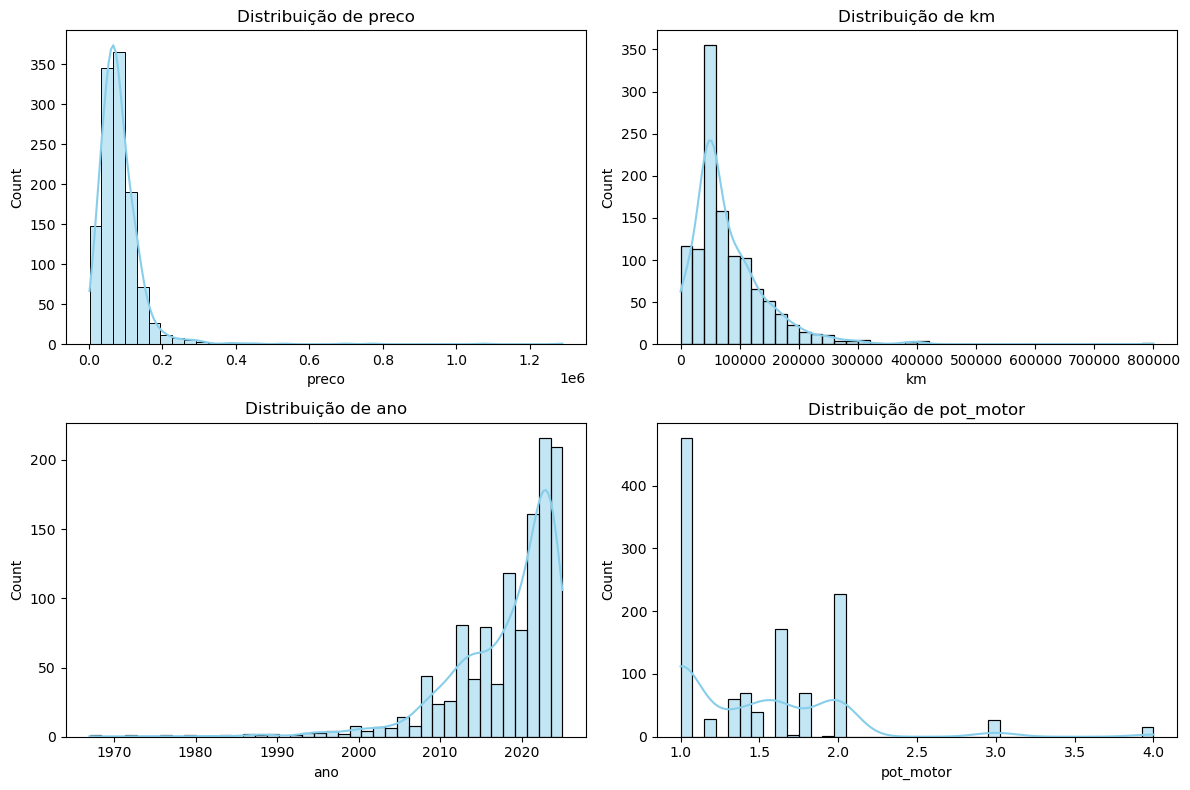

In [3560]:
num_cols = df[['preco','km','ano','pot_motor']]


# Plotando a distribuição
plt.figure(figsize=(12, 8))

# Usando seaborn para criar um gráfico de distribuição
for i, column in enumerate(num_cols.columns):
    plt.subplot(2, 2, i+1)  # cria 2x2 subgráficos
    sns.histplot(num_cols[column], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribuição de {column}')
    plt.tight_layout()

plt.show()

In [3561]:
df_raw = df.copy()

In [3562]:
# Definindo as faixas personalizadas para cada coluna
preco_bins = [0, 50000, 100000, 200000, 1500000]
km_bins = [0, 10000, 50000, 100000, 800000]
ano_bins = [1950, 2000, 2010, 2020,2025]
pot_motor_bins = [0, 1.5, 2.2, 4.0]
portas_bins = [0,2,4]

# Aplicando as faixas personalizadas para as colunas
df['preco'] = pd.cut(df['preco'], bins=preco_bins)
df['km'] = pd.cut(df['km'], bins=km_bins)
df['ano'] = pd.cut(df['ano'], bins=ano_bins)
df['portas'] = pd.cut(df['portas'], bins=portas_bins)
df['pot_motor'] = pd.cut(df['pot_motor'], bins=pot_motor_bins)

In [3563]:
df.head(5)

,preco,marca,km,ano,tipo,pot_motor,kit_gnv,cor,combustivel,portas,cambio,direcao
id,,,,,,,,,,,,
1,"(50000, 100000]",volkswagen,"(10000, 50000]","(2020, 2025]",sedã,"(0.0, 1.5]",0,branco,flex,"(2, 4]",manual,hidráulica
2,"(50000, 100000]",fiat,"(10000, 50000]","(2020, 2025]",hatch,"(0.0, 1.5]",0,branco,flex,"(2, 4]",manual,elétrica
3,"(50000, 100000]",volkswagen,"(10000, 50000]","(2020, 2025]",sedã,"(0.0, 1.5]",0,branco,flex,"(2, 4]",manual,hidráulica
4,"(50000, 100000]",hyundai,"(100000, 800000]","(2010, 2020]",hatch,"(1.5, 2.2]",0,branco,flex,"(2, 4]",manual,hidráulica
27,"(50000, 100000]",volkswagen,"(50000, 100000]","(2020, 2025]",hatch,"(0.0, 1.5]",0,cinza,flex,"(2, 4]",manual,mecânica


In [3564]:
df['portas'].value_counts()

portas
(2, 4]    1098
(0, 2]      87
Name: count, dtype: int64

In [3565]:
df['preco'].value_counts()

preco
(50000, 100000]      573
(0, 50000]           299
(100000, 200000]     278
(200000, 1500000]     35
Name: count, dtype: int64

In [3566]:
df['km'].value_counts()

km
(50000, 100000]     405
(10000, 50000]      380
(100000, 800000]    328
(0, 10000]           53
Name: count, dtype: int64

In [3567]:
df['ano'].value_counts()

ano
(2020, 2025]    586
(2010, 2020]    461
(2000, 2010]    107
(1950, 2000]     31
Name: count, dtype: int64

In [3568]:
df['pot_motor'].value_counts()

pot_motor
(0.0, 1.5]    672
(1.5, 2.2]    471
(2.2, 4.0]     42
Name: count, dtype: int64

In [3569]:
df['portas'].value_counts()

portas
(2, 4]    1098
(0, 2]      87
Name: count, dtype: int64

### 4.0 Criação do DataFrame Dummy, é criado uma coluna para cada variavel e é atribuído o valor 0 ou 1 dependendendo se o dado possui determinada caracteristic.

In [3571]:
for col in df.columns:
    df.loc[:, col] = df[col].astype(str)

df_dummy = pd.get_dummies(df, dtype=int)
df_dummy = df_dummy.drop('km_nan', axis=1)
df_dummy

,"preco_(0, 50000]","preco_(100000, 200000]","preco_(200000, 1500000]","preco_(50000, 100000]",marca_audi,marca_bmw,marca_byd,marca_chery,marca_chevrolet,marca_chrysler,marca_citroen,marca_fiat,marca_ford,marca_honda,marca_hyundai,marca_iveco,marca_jeep,marca_kia motors,marca_land rover,marca_lifan,marca_mercedes-benz,marca_mini,marca_mitsubishi,marca_nissan,marca_peugeot,marca_porsche,marca_ram,marca_renault,marca_ssangyong,marca_suzuki,marca_toyota,marca_volkswagen,marca_volvo,"km_(0, 10000]","km_(10000, 50000]","km_(100000, 800000]","km_(50000, 100000]","ano_(1950, 2000]","ano_(2000, 2010]","ano_(2010, 2020]","ano_(2020, 2025]",tipo_buggy,tipo_conversível,tipo_coupé,tipo_elétrica,tipo_hatch,tipo_hidráulica,tipo_mecânica,tipo_perua,tipo_pick-up,tipo_sedã,tipo_suv,tipo_van/utilitário,"pot_motor_(0.0, 1.5]","pot_motor_(1.5, 2.2]","pot_motor_(2.2, 4.0]",kit_gnv_0,kit_gnv_1,cor_amarelo,cor_azul,cor_branco,cor_cinza,cor_laranja,cor_outra,cor_prata,cor_preto,cor_verde,cor_vermelho,combustivel_diesel,combustivel_elétrico,combustivel_flex,combustivel_gasolina,combustivel_híbrido,combustivel_álcool,"portas_(0, 2]","portas_(2, 4]",cambio_automatizado,cambio_automático,cambio_manual,cambio_semi-automático,direcao_5,direcao_assistida,direcao_elétrica,direcao_hidráulica,direcao_mecânica
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1364,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [3572]:
df_dummy.shape

(1185, 85)

In [3573]:
df_dummy.isna().sum().sum()

0

In [3574]:
df_cosine = df_dummy.copy()
df_cosine = pd.DataFrame(cosine_distances(df_dummy), index=df_dummy.index, columns=df_dummy.index)
df_cosine

id        1         2         3         4         27        28        29    \
id                                                                           
1     0.000000  0.250000  0.000000  0.416667  0.333333  0.500000  0.416667   
2     0.250000  0.000000  0.250000  0.416667  0.333333  0.333333  0.250000   
3     0.000000  0.250000  0.000000  0.416667  0.333333  0.500000  0.416667   
4     0.416667  0.416667  0.416667  0.000000  0.500000  0.666667  0.583333   
27    0.333333  0.333333  0.333333  0.500000  0.000000  0.416667  0.333333   
...        ...       ...       ...       ...       ...       ...       ...   
1363  0.250000  0.166667  0.250000  0.416667  0.166667  0.416667  0.333333   
1364  0.416667  0.250000  0.416667  0.583333  0.333333  0.083333  0.000000   
1365  0.333333  0.333333  0.333333  0.500000  0.333333  0.500000  0.416667   
1366  0.166667  0.250000  0.166667  0.333333  0.166667  0.500000  0.416667   
1367  0.250000  0.166667  0.250000  0.500000  0.166667  0.250000  0.166667   

id        30        31        32        33        34        35        36    \
id                                                                           
1     0.333333  0.166667  0.250000  0.500000  0.583333  0.750000  0.583333   
2     0.333333  0.166667  0.250000  0.416667  0.500000  0.833333  0.500000   
3     0.333333  0.166667  0.250000  0.500000  0.583333  0.750000  0.583333   
4     0.500000  0.416667  0.500000  0.750000  0.583333  0.750000  0.666667   
27    0.333333  0.416667  0.500000  0.583333  0.500000  0.750000  0.666667   
...        ...       ...       ...       ...       ...       ...       ...   
1363  0.333333  0.250000  0.333333  0.500000  0.416667  0.833333  0.583333   
1364  0.500000  0.333333  0.250000  0.250000  0.333333  0.666667  0.416667   
1365  0.333333  0.166667  0.250000  0.500000  0.416667  0.833333  0.583333   
1366  0.250000  0.333333  0.416667  0.583333  0.500000  0.750000  0.666667   
1367  0.416667  0.250000  0.333333  0.416667  0.500000  0.750000  0.500000   

id        37        38        39        40        41        42        43    \
id                                                                           
1     0.416667  0.583333  0.416667  0.500000  0.416667  0.166667  0.333333   
2     0.416667  0.416667  0.416667  0.416667  0.250000  0.083333  0.166667   
3     0.416667  0.583333  0.416667  0.500000  0.416667  0.166667  0.333333   
4     0.750000  0.750000  0.750000  0.750000  0.500000  0.500000  0.500000   
27    0.500000  0.500000  0.416667  0.583333  0.333333  0.416667  0.333333   
...        ...       ...       ...       ...       ...       ...       ...   
1363  0.416667  0.416667  0.416667  0.500000  0.166667  0.250000  0.250000   
1364  0.333333  0.416667  0.250000  0.250000  0.166667  0.333333  0.166667   
1365  0.500000  0.416667  0.500000  0.416667  0.333333  0.250000  0.333333   
1366  0.500000  0.500000  0.500000  0.583333  0.250000  0.333333  0.333333   
1367  0.333333  0.500000  0.250000  0.416667  0.333333  0.250000  0.166667   

id        44        45        46        47        48        49        50    \
id                                                                           
1     0.666667  0.250000  0.500000  0.333333  0.416667  0.250000  0.500000   
2     0.750000  0.083333  0.333333  0.500000  0.250000  0.083333  0.500000   
3     0.666667  0.250000  0.500000  0.333333  0.416667  0.250000  0.500000   
4     0.416667  0.333333  0.666667  0.583333  0.583333  0.416667  0.583333   
27    0.666667  0.333333  0.500000  0.416667  0.416667  0.333333  0.500000   
...        ...       ...       ...       ...       ...       ...       ...   
1363  0.750000  0.166667  0.333333  0.333333  0.333333  0.166667  0.583333   
1364  0.583333  0.250000  0.416667  0.500000  0.083333  0.166667  0.666667   
1365  0.750000  0.250000  0.416667  0.500000  0.333333  0.333333  0.500000   
1366  0.666667  0.250000  0.416667  0.250000  0.416667  0.250000  0.583333   
1367  0.666667  0.1

### 5.0 Treinamento do modelo Kmeans e usando o método do cotovelo para definir o números de clusters

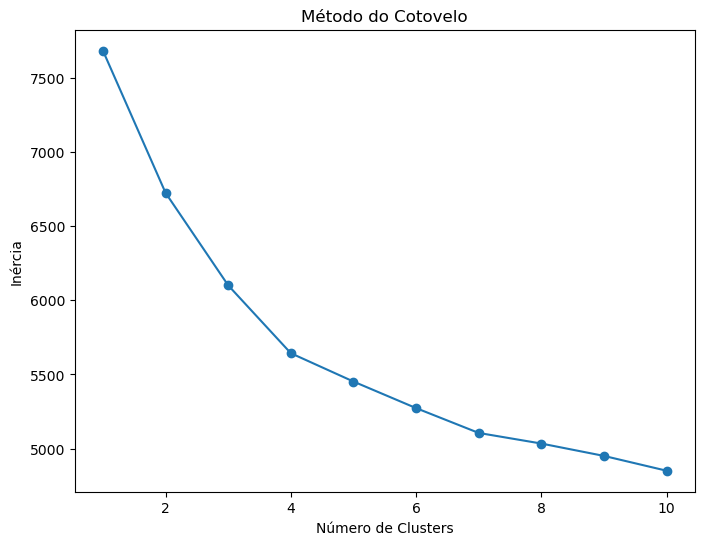

In [3576]:
# Supondo que 'df_dummy' seja o seu DataFrame com os dados
X = df_dummy.values

# Lista para armazenar os valores da inércia
inertia = []

# Definir o intervalo de números de clusters
range_n_clusters = list(range(1, 11))

# Calcular a inércia para cada número de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show();

In [3577]:
km = KMeans(n_clusters=4, random_state=42)
cluster = km.fit_predict(df_cosine)
df_dummy['cluster'] = cluster
df_raw['cluster'] = cluster


In [3578]:
df_dummy.groupby('cluster').mean() * 100

,"preco_(0, 50000]","preco_(100000, 200000]","preco_(200000, 1500000]","preco_(50000, 100000]",marca_audi,marca_bmw,marca_byd,marca_chery,marca_chevrolet,marca_chrysler,marca_citroen,marca_fiat,marca_ford,marca_honda,marca_hyundai,marca_iveco,marca_jeep,marca_kia motors,marca_land rover,marca_lifan,marca_mercedes-benz,marca_mini,marca_mitsubishi,marca_nissan,marca_peugeot,marca_porsche,marca_ram,marca_renault,marca_ssangyong,marca_suzuki,marca_toyota,marca_volkswagen,marca_volvo,"km_(0, 10000]","km_(10000, 50000]","km_(100000, 800000]","km_(50000, 100000]","ano_(1950, 2000]","ano_(2000, 2010]","ano_(2010, 2020]","ano_(2020, 2025]",tipo_buggy,tipo_conversível,tipo_coupé,tipo_elétrica,tipo_hatch,tipo_hidráulica,tipo_mecânica,tipo_perua,tipo_pick-up,tipo_sedã,tipo_suv,tipo_van/utilitário,"pot_motor_(0.0, 1.5]","pot_motor_(1.5, 2.2]","pot_motor_(2.2, 4.0]",kit_gnv_0,kit_gnv_1,cor_amarelo,cor_azul,cor_branco,cor_cinza,cor_laranja,cor_outra,cor_prata,cor_preto,cor_verde,cor_vermelho,combustivel_diesel,combustivel_elétrico,combustivel_flex,combustivel_gasolina,combustivel_híbrido,combustivel_álcool,"portas_(0, 2]","portas_(2, 4]",cambio_automatizado,cambio_automático,cambio_manual,cambio_semi-automático,direcao_5,direcao_assistida,direcao_elétrica,direcao_hidráulica,direcao_mecânica
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.916933,2.236422,0.000000,95.846645,0.000000,0.000000,0.000000,0.000000,27.795527,0.000000,0.958466,25.239617,1.916933,0.958466,18.210863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.514377,0.000000,0.000000,3.194888,0.000000,0.000000,0.958466,17.252396,0.000000,1.597444,58.466454,0.958466,38.658147,0.000000,0.000000,8.945687,91.054313,0.000000,0.000000,0.000000,5.111821,72.843450,0.638978,0.000000,0.000000,3.514377,15.015974,0.319489,2.555911,98.083067,1.597444,0.319489,100.000000,0.000000,0.000000,0.958466,50.159744,11.501597,0.000000,0.000000,21.725240,12.140575,0.638978,2.875399,0.319489,0.000000,99.680511,0.000000,0.000000,0.000000,4.472843,95.527157,0.000000,15.654952,84.345048,0.000000,0.000000,0.319489,72.204473,23.961661,3.514377
1,2.506964,56.824513,3.342618,37.325905,0.835655,0.835655,0.557103,1.392758,19.498607,0.000000,2.506964,7.520891,2.506964,6.406685,7.520891,0.000000,14.763231,0.278552,0.000000,0.000000,0.835655,0.000000,0.278552,4.178273,2.506964,0.278552,1.114206,2.785515,0.000000,0.557103,5.571031,16.713092,0.557103,4.735376,47.353760,8.077994,36.490251,0.000000,0.000000,27.576602,72.423398,0.000000,0.278552,0.557103,6.128134,8.913649,0.835655,0.835655,0.278552,6.963788,15.877437,57.103064,2.228412,52.924791,45.961003,1.114206,99.442897,0.557103,0.278552,4.456825,35.654596,18.941504,0.000000,2.506964,16.991643,17.270195,0.278552,3.621170,5.849582,0.835655,86.072423,5.571031,1.671309,0.000000,1.114206,98.885794,0.000000,99.164345,0.835655,0.000000,0.835655,0.000000,89.415042,5.849582,3.899721
2,28.514056,26.907631,9.236948,35.341365,1.204819,2.008032,0.000000,0.401606,14.457831,0.401606,0.803213,4.016064,8.032129,2.008032,6.827309,0.803213,6.827309,1.204819,2.811245,0.401606,2.409639,1.204819,4.819277,4.417671,3.614458,2.811245,0.401606,0.803213,0.401606,2.008032,11.646586,10.040161,3.212851,8.433735,7.630522,53.012048,29.718876,11.244980,18.072289,59.839357,10.843373,0.803213,0.401606,0.803213,0.803213,6.827309,5.622490,2.409639,4.016064,22.489960,20.080321,30.522088,5.220884,5.622490,79.518072,14.859438,93.975904,6.024096,1.204819,5.622490,29.718876,13.253012,0.401606,2.008032,16.867470,21.686747,2.409639,6.827309,30.120482,0.401606,21.285141,43.775100,1.204819,3.212851,17.670683,82.329317,0.803213,71.887550,27.309237,0.000000,4.016064,0.000000,22.891566,63.453815,9.638554
3,80.681818,0.000000,0.000000,19.318182,0.378788,0.000000,0.000000,0.000000,14.772727,0.378788,1.515152,19.318182,15.530303,1.515152,6.439394,0.378788,0.000000,0.378788,0.000000,0.000000,0.000000,0.000000,0.000000,1.515152,2.272727,0

In [3579]:
df_raw.head()

,preco,marca,km,ano,tipo,pot_motor,kit_gnv,cor,combustivel,portas,cambio,direcao,cluster
id,,,,,,,,,,,,,
1,63390.0,volkswagen,49798,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica,0
2,73990.0,fiat,47248,2024,hatch,1.0,0,branco,flex,4.0,manual,elétrica,0
3,59590.0,volkswagen,44762,2023,sedã,1.0,0,branco,flex,4.0,manual,hidráulica,0
4,52900.0,hyundai,116000,2014,hatch,1.6,0,branco,flex,4.0,manual,hidráulica,3
27,76190.0,volkswagen,54463,2023,hatch,1.0,0,cinza,flex,4.0,manual,mecânica,0


In [3580]:
df_raw.groupby('cluster')[['preco','portas','ano']].mean().sort_values(by='preco', ascending=False)

,preco,portas,ano
cluster,,,
1,112737.905292,3.974930,2021.454039
2,107357.289157,3.638554,2012.208835
0,71809.702875,3.910543,2022.837061
3,38692.848485,3.806818,2013.704545


In [3581]:
df_raw['cluster'].value_counts()

cluster
1    359
0    313
3    264
2    249
Name: count, dtype: int64

In [3582]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 1 to 1367
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   preco        1185 non-null   float64
 1   marca        1185 non-null   object 
 2   km           1185 non-null   int64  
 3   ano          1185 non-null   int64  
 4   tipo         1185 non-null   object 
 5   pot_motor    1185 non-null   float64
 6   kit_gnv      1185 non-null   int64  
 7   cor          1185 non-null   object 
 8   combustivel  1185 non-null   object 
 9   portas       1185 non-null   float64
 10  cambio       1185 non-null   object 
 11  direcao      1185 non-null   object 
 12  cluster      1185 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 157.3+ KB


In [3583]:
df_numeric = df_raw[['preco','portas','ano','km','pot_motor','kit_gnv','cluster']]

In [3584]:

# Selecionar dados numéricos
X = df_numeric.drop(columns='cluster')
y = df_raw['cluster']

# Calcular ANOVA F-Score
f_score, p_values = f_classif(X, y)

# Criar um DataFrame com os resultados
anova_results = pd.DataFrame({
    'Variável': X.columns,
    'F-Score': f_score,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_results)


    Variável     F-Score        p-Value
2        ano  311.875927  4.285729e-149
4  pot_motor  302.991714  7.555356e-146
3         km  155.338680   7.389519e-85
0      preco   74.916201   2.324035e-44
1     portas   23.571291   8.075515e-15
5    kit_gnv   11.008160   3.939884e-07


In [3585]:
df_numeric.groupby('cluster')['ano'].mean()

cluster
0    2022.837061
1    2021.454039
2    2012.208835
3    2013.704545
Name: ano, dtype: float64

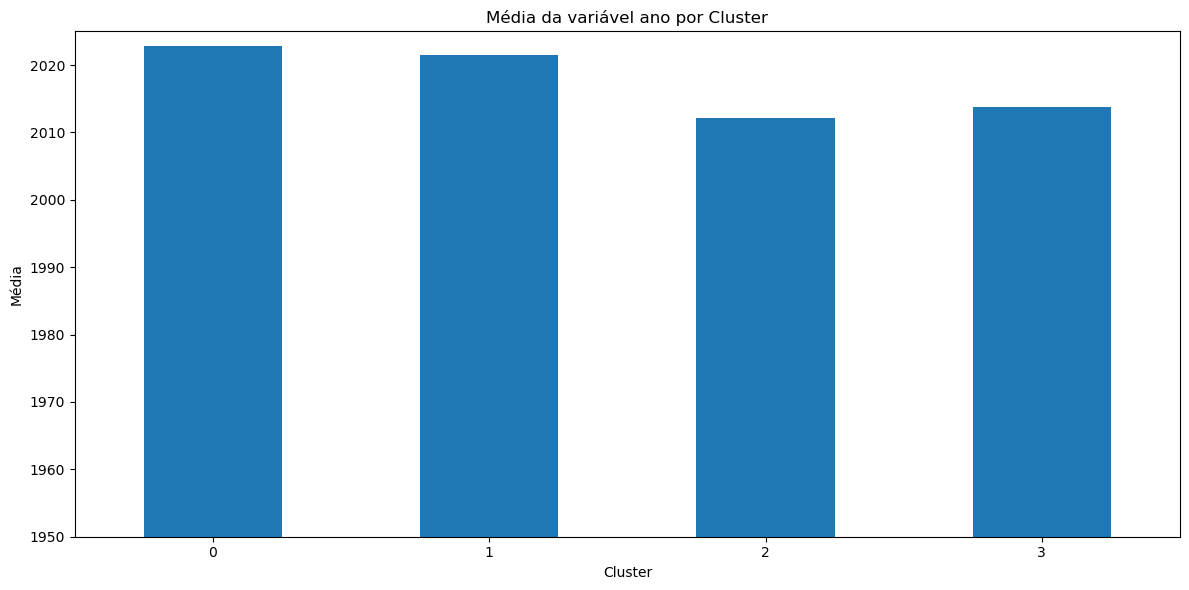

In [3586]:
cluster_means = df_numeric.groupby('cluster')['ano'].mean()

# Plotando as médias da variável "ano" por cluster
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar', figsize=(12, 6))  # Usar o cluster_means diretamente para criar o gráfico de barras
plt.title('Média da variável ano por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.xticks(rotation=0)  # Ajuste para a rotação dos rótulos no eixo x
plt.ylim(1950, 2025)  # Ajustando os limites do eixo y
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

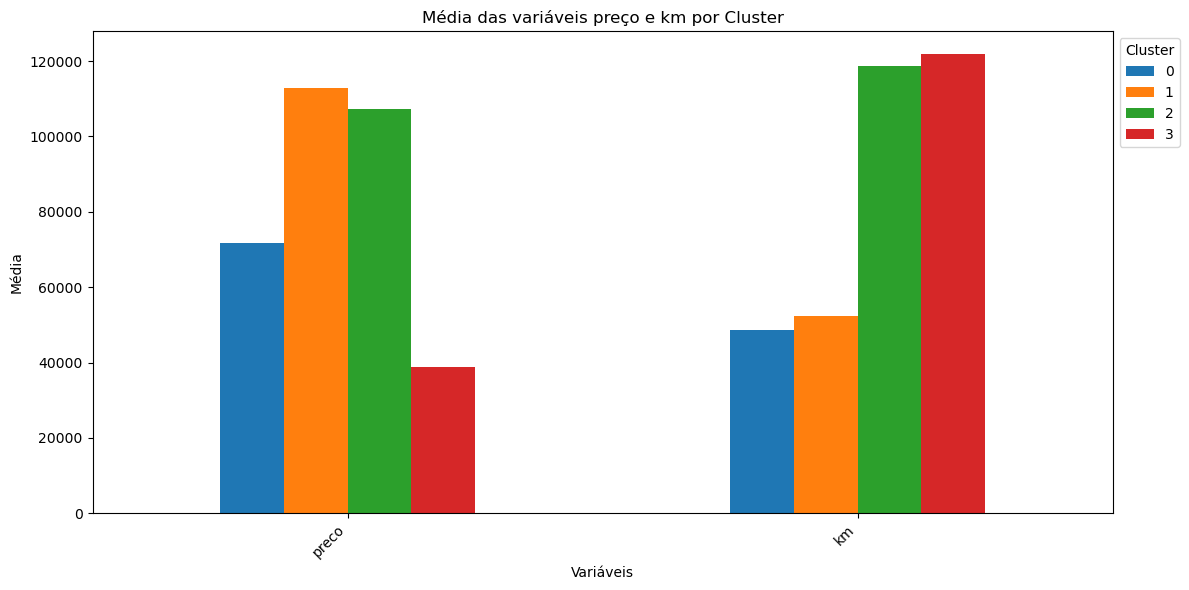

In [3587]:
cluster_means = df_numeric.groupby('cluster')[['preco', 'km']].mean()

# Plotando as médias das variáveis por cluster
plt.figure(figsize=(10, 6))
cluster_means.T.plot(kind='bar', figsize=(12, 6))  # T para transpor e exibir variáveis nas colunas
plt.title('Média das variáveis preço e km por Cluster')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

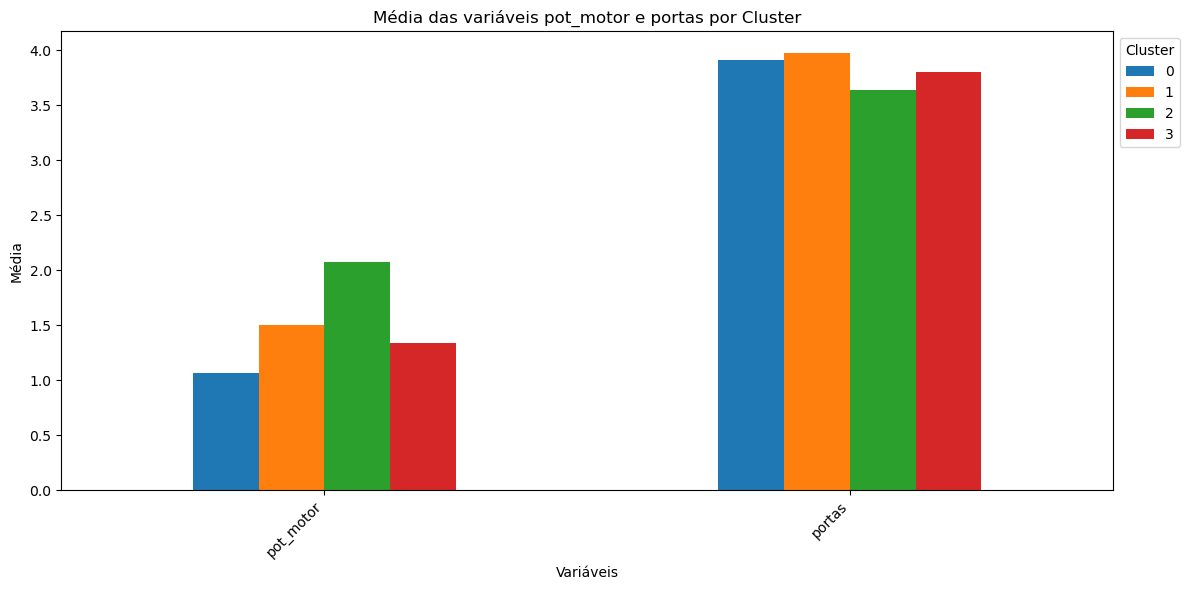

In [3588]:
cluster_means = df_numeric.groupby('cluster')[['pot_motor', 'portas']].mean()

# Plotando as médias das variáveis por cluster
plt.figure(figsize=(10, 6))
cluster_means.T.plot(kind='bar', figsize=(12, 6))  # T para transpor e exibir variáveis nas colunas
plt.title('Média das variáveis pot_motor e portas por Cluster')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## | Cluster 0(azul) e 1(laranja) pode se encaixar nos carros novos em relação ao ano. A maior diferença do Cluster 1 para o 0 é um ticket maior levando como cosequência um melhor pot_motor.
## | É possível determinar que o cluster 2(verde) representa uma tendência de carros de ticket mais altos(logo com melhor pot_motor) com preferencia a marcas como porsche, bmw e mercedes por exemplo.
## | Diferente do cluster 3(vermelho), que representa carros com preços mais em conta, tendo a maior média de km rodadados e a menor de preço.

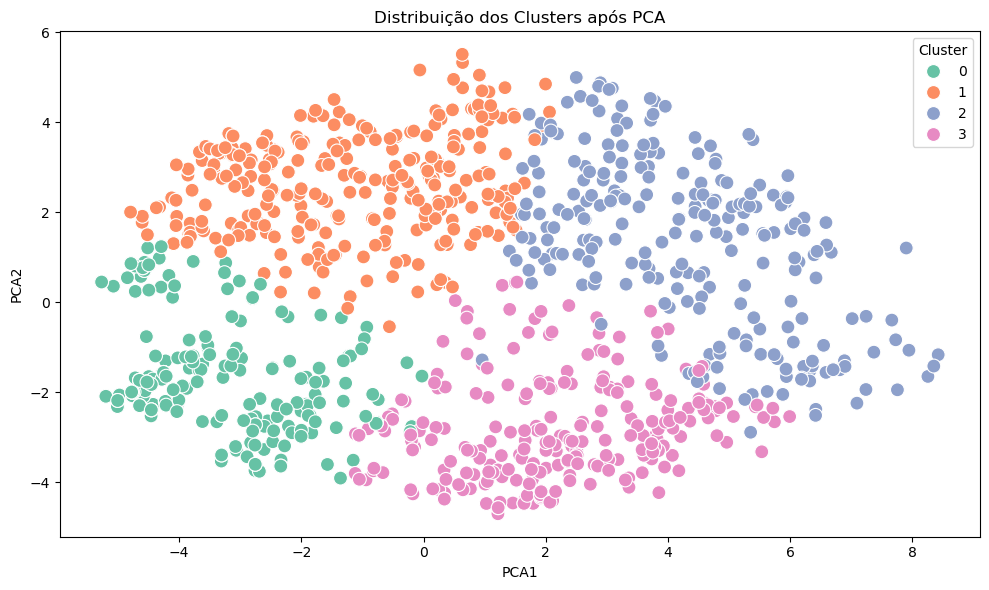

In [3591]:


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cosine)  


df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_df['Cluster'] = cluster  


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df_pca_df, s=100, marker='o')
plt.title('Distribuição dos Clusters após PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


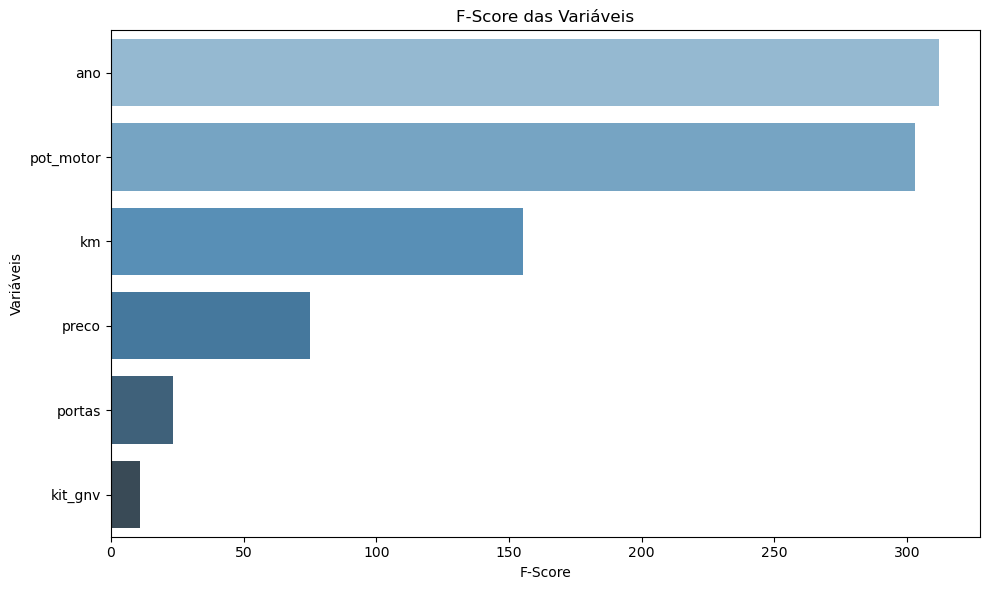

In [3592]:
df_fscore = pd.DataFrame(anova_results)

# Plotando F-Score
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Variável', data=df_fscore, palette='Blues_d')
plt.title('F-Score das Variáveis')
plt.xlabel('F-Score')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


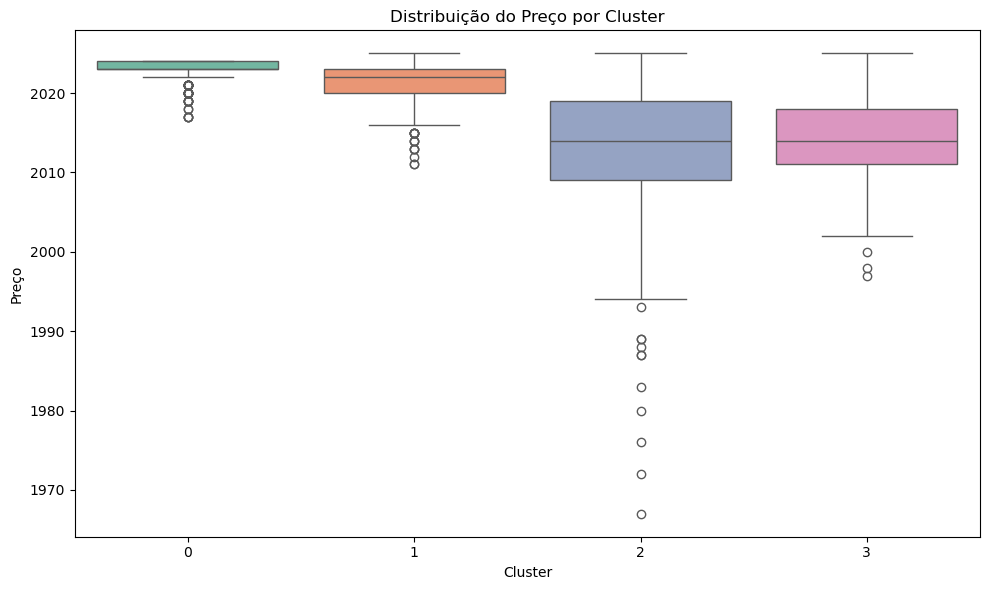

In [3593]:

plt.figure(figsize=(10, 6))

# Usando um boxplot para visualizar o preço por cluster
sns.boxplot(x='cluster', y='ano', data=df_raw, palette='Set2')

plt.title('Distribuição do Preço por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()


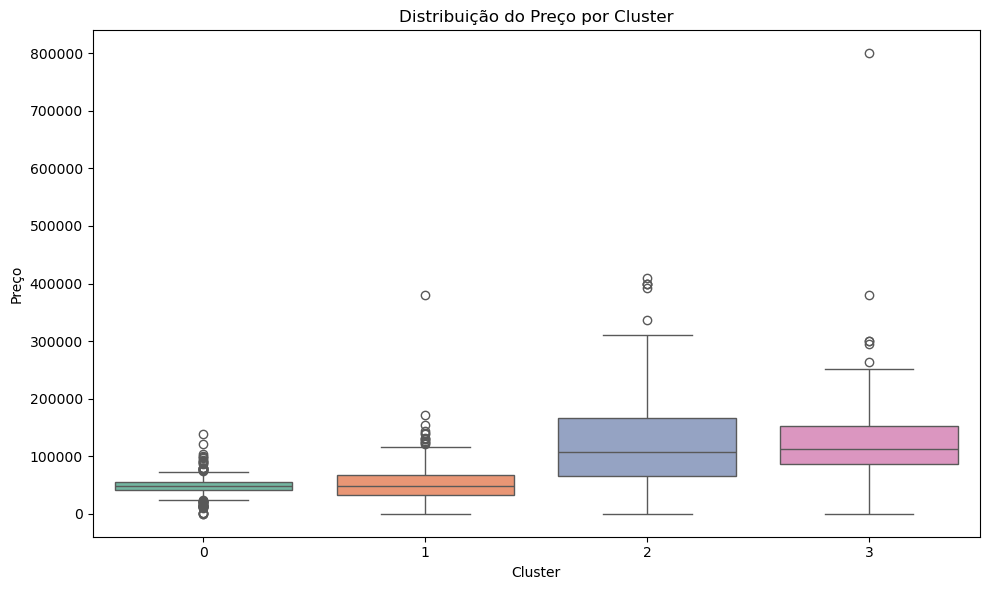

In [3594]:

plt.figure(figsize=(10, 6))

# Usando um boxplot para visualizar o preço por cluster
sns.boxplot(x='cluster', y='km', data=df_raw, palette='Set2')

plt.title('Distribuição do Preço por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

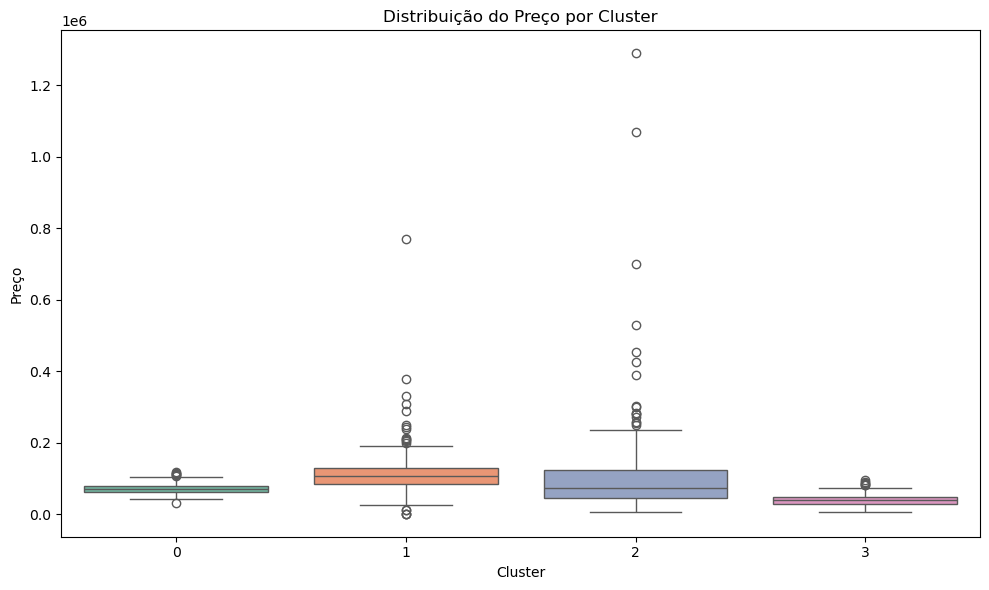

In [3595]:

plt.figure(figsize=(10, 6))

# Usando um boxplot para visualizar o preço por cluster
sns.boxplot(x='cluster', y='preco', data=df_raw, palette='Set2')

plt.title('Distribuição do Preço por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

## Ref

- https://www.automaxfiat.com.br/potencia-de-carro-o-que-levar-em-consideracao-na-hora-da-compra/
<br>
- [Live #09 - Machine Learning na Prática: K-Means e Categóricas](https://www.youtube.com/watch?v=IK1HcHwv9Y4&t=1538s)
-  https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.pairwise.cosine_distances.html
-  https://medium.com/@arjunprakash027/understanding-cosine-similarity-a-key-concept-in-data-science-72a0fcc57599